<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
    <td style="text-align:left; background-color:transparent">Datenanalyse mit Python</td>
    <td style="text-align:right; background-color:transparent">Manfred Hammerl</td>
  </tr>
</table>

# 11) Einfache grafische Datenanalyse

Dieses Kapitel stellt die Möglichkeiten von **Pandas** vor, div. einfache und gebräuchliche Grafiken (z.B. Boxplot, Histogramm, Streudiagramm und viele andere) zu erstellen. Importieren wir dazu erstmal wieder unseren bereits bekannten einfachen Datensatz.

In [2]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3).round(2)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.67,3.67
1,1,57,1,1.00,3.33
2,2,66,3,2.00,4.33


### 11.1) Plotting Teil 1

**Pandas** bietet mit der Funktion **plot()** bzw. dem Attribut **plot** (vgl. nachfolgenden Link, mit beiden Möglichkeiten können die hier behandelten Grafiken aufgerufen werden) die Möglichkeit, auf einfache Weise diverse gebräuchliche Grafiken zu erstellen. Im Grunde werden die Grafiken dabei nicht von **Pandas** erstellt, sondern die **Pandas** Funktion **plot()** bzw. das Attribut **plot** stehen dabei einfach für die entsprechende Funktion aus dem Paket **Matplotlib** (welches in Kapitel 13 behandelt wird): **matplotlib.pyplot.plot()** (kurz meist mit **plt.plot()** importiert und verwendet). Dies soll uns hier aber nicht weiter beschäftigen, das Kapitel heißt schließlich 'einfache grafische Datenanalyse' - daher nutzen wir die einfach zugänglichen Möglichkeiten von **Pandas**, wenn auch die Gestaltungsmöglichkeiten der Grafiken mit diesen Möglichkeiten (zumindest auf den ersten Blick) nicht sehr umfangreich sind. Publikationsreife Grafiken werden mit **Pandas** kaum erstellt, dies ist Thema von Kapitel 13. Die Grafiken des aktuellen Kapitels dienen eher einer ersten Übersicht und explorativen Datenanalyse.

[Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting)

[Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#)

[Plot formatting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting)

Unter [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) werden diverse Parameter gelistet, welche man bei den folgenden Grafiken zur weiteren Gestaltung heranziehen kann.

Im Folgenden eine Übersicht der verfügbaren Grafiken und ihrer Standardaufrufe (*df* steht dabei für den Namen des Dataframes):

|Grafik|Attribut *plot*|Funktion *plot()*|
|-|-|-|
|Liniendiagramm|df.plot.line()|df.plot(kind = 'line')|
|Säulendiagramm|df.plot.bar()|df.plot(kind = 'bar')|
|Balkendiagramm|df.plot.barh()|df.plot(kind = 'barh')|
|Histogramm|df.plot.hist()|df.plot(kind = 'hist')|
|Boxplot|df.plot.box()|df.plot(kind = 'box')|
|KDE Plot|df.plot.kde()|df.plot(kind = 'kde')|
|Density Plot|df.plot.density()|df.plot(kind = 'density')|
|Area Plot|df.plot.area()|df.plot(kind = 'area')|
|Tortendiagramm|df.plot.pie()|df.plot(kind = 'pie')|
|Streudiagramm|df.plot.scatter()|df.plot(kind = 'scatter')|
|Hexbin Plot|df.plot.hexbin()|df.plot(kind = 'hexbin')|

Boxplots können zusätzlich noch mit **df.boxplot()** aufgerufen werden, Histogramme zusätzlich mit **df.hist()**. Wir sehen, es gibt in **Pandas**  viele Möglichkeiten, zu all diesen Grafiken zu kommen...

Sehen wir uns nun einige Beispiele an.

##### Boxplot

Ein Boxplot kann mit **plot.box()** aufgerufen werden. Man kann dies auf das ganze Dataframe anwenden.

[pandas.DataFrame.plot.box](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html#pandas.DataFrame.plot.box)

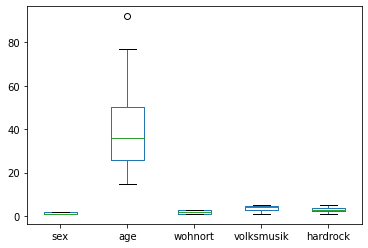

In [3]:
ax = daten.plot.box()

Dies ist - wie oben ersichtlich - jedoch meist nicht empfehlenswert, da unterschiedlichste Arten von Variablen vorliegen, und meist auch nicht gewünscht, da man sich typischerweise nur über ausgewählte Variablen ein Bild verschaffen möchte. Wählen wir nachfolgend die beiden Variablen *volksmusik* und *hardrock* aus. Bei beiden handelt es sich um 5-stufige Skalen, welche etwas über die Musikpräferenz der Befragten aussagen - es macht also Sinn, die beiden Variablen zu vergleichen.

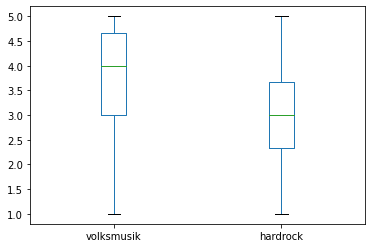

In [4]:
ax = daten[['volksmusik', 'hardrock']].plot.box()

**Pandas** bietet eine weitere Möglichkeit, Boxplots aufzurufen, nämlich mit der Funktion **boxplot()**. Das Ergebnis ist das Gleiche, außer dass dabei standardmäßig horizontale Bezugslinien angezeigt werden.

[pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot)

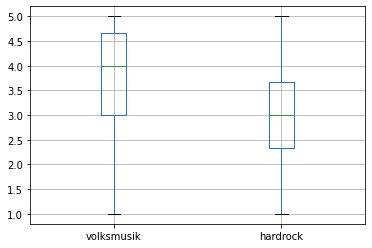

In [5]:
ax = daten.boxplot(column = ["volksmusik", "hardrock"])

Diese Bezugslinien (*grid*) kann man aber entfernen, wenn man möchte. Außerdem können wir die Schriftgröße der Achsen anpassen.

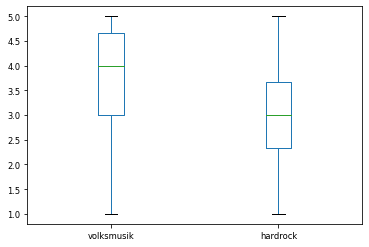

In [6]:
ax = daten[["volksmusik", "hardrock"]].boxplot(grid = False, fontsize = "small")

Schließlich kann mit dem Parameter *figsize* auch die Größe der Grafik verändert werden.

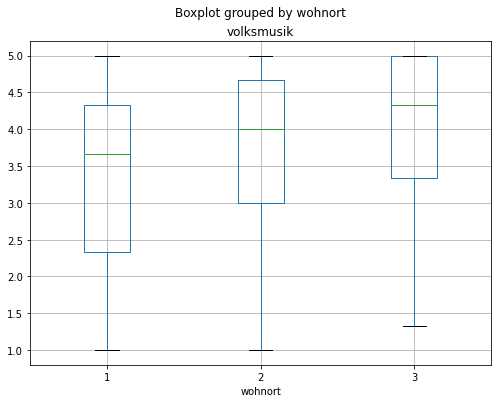

In [7]:
ax = daten.boxplot(column = "volksmusik", by = "wohnort", figsize = (8, 6)) # 8 inches breit, 6 inches hoch

# column: Die 'abhängige' Variable
# by: Die Gruppierungsvariable

Vieles, was für den Boxplot galt, gilt auch für einige andere nun noch folgende Grafiken. Dies wird nicht nochmal wiederholt, sodass weitere Grafikarten mit weniger Beispielen auskommen :-)

##### Histogramm

Aufruf des Histogramms mit **plot.hist()** oder mit der Funktion **hist()**. Stellen wir im Folgenden die Verteilung des Alters (Variable *age*) dar.

[pandas.DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist)

[pandas.DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist)

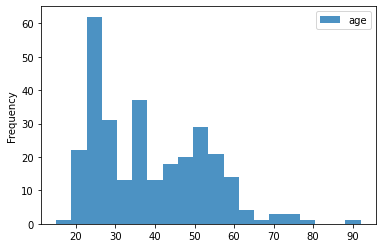

In [8]:
ax = daten.age.plot.hist(bins = 20, alpha = 0.8, legend = True)

# bins: Anzahl der Balken
# alpha: Grad der Transparenz von 0 bis 1
# legend: Anzeige der Legende

Wir können die Altersverteilung auch getrennt nach Geschlecht (Variable *sex*, 1 = weiblich, 2 = männlich) abbilden. Färben wir die Balken dann auch zur Abwechslung auch in einer anderen Farbe.

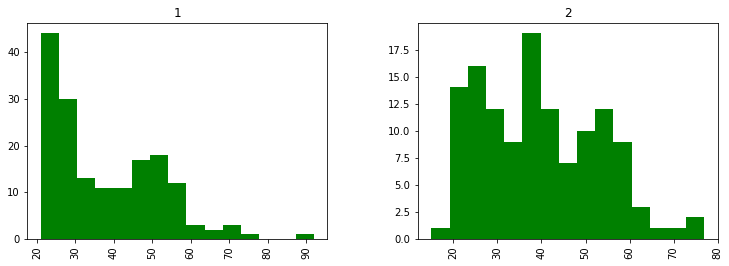

In [9]:
ax = daten.hist(column = "age", by = "sex", bins = 15, figsize = (12,4), color = "green")

Obige Abbildungen stellen zwar die gleiche Variable *age* dar, die Y-Achse ist jedoch unterschiedlich skaliert, sodass ein Vergleich schwer fällt. Unten sehen wir, dass dies leicht angepasst werden kann und zwar mit dem Parameter *sharey*. Nun weist die Y-Achse in beiden Abbildungen (links und recht) die gleiche Skalierung auf.

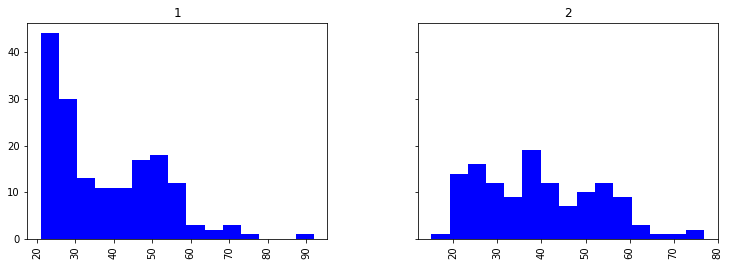

In [10]:
ax = daten.hist(column = "age", by = "sex", bins = 15, figsize = (12,4), color = "blue", sharey = True)

##### KDE Plot (Density Plot)

KDE steht für Kernel Density Estimation. Es geht dabei um die grafische Darstellung der Verteilung der Werte von Variablen. Sehen wir uns nachfolgend die Verteilung für die beiden Variablen *volksmusik* und *hardrock* an.

[pandas.DataFrame.plot.kde](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html#pandas.DataFrame.plot.kde)

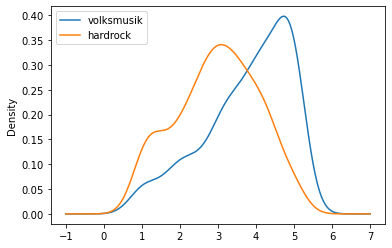

In [11]:
ax = daten[["volksmusik", "hardrock"]].plot.kde()

##### Density Plot (KDE Plot)

Und nun, mit anderer Schreibweise, die Altersverteilung als Density Plot (was einem KDE Plot entspricht).

[pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html#pandas.DataFrame.plot.density)

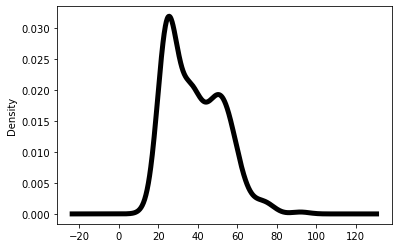

In [12]:
ax = daten.age.plot.density(color = "k", lw = 5)

# mit color kann die Linienfarbe geändert werden, 'k' steht für black
# lw = line width, also die Stärke der Linie

##### Streudiagramm

Mit einem Streudiagramm bilden wir nun erstmals 2 Variablen gegeneinander ab. Auf diese Weise kann - so vorhanden - auch leicht visuell ein Zusammenhang zwischen beiden Variablen erkannt werden (daher ist ein Streudiagramm auch sinnvoll, wenn man plant, eine Korrelation oder Regression zu rechnen).

[pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter)

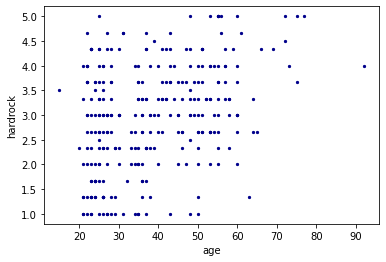

In [13]:
ax = daten.plot.scatter(x = 'age', y = 'hardrock', c = 'DarkBlue', s = 5)

# c steht für color (der Punkte im Diagramm)
# s steht für size, also die Größe der Punkte

Wir können auch eine dritte Variable ins Streudiagramm aufnehmen. Dem Parameter *color* (*c*) wird in diesem Fall keine Farbe übergeben, sondern eine Variable (*wohnort* in unserem Beispiel). Die Punkte werden sodann entsprechend den Ausprägungen dieser Variable eingefärbt. Welche Farben das sein sollen, können wir durch die Auswahl einer *colormap* ([Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) entscheiden. Die Colormap weist zwar eine kontinuierliche Farbskala auf, im Streudiagramm finden sich aber natürlich nur die Farben an den Stellen '1', '2' und '3' wieder (was den Ausprägungen der Variable *wohnort* entspricht).

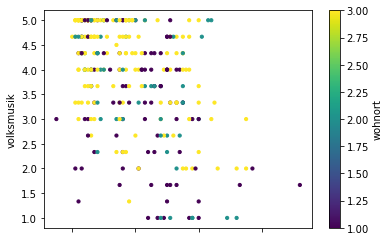

In [14]:
ax = daten.plot.scatter(x = 'age', y = 'volksmusik', c = 'wohnort', colormap = 'viridis', s = 10)

##### Hexbin Plot

Ähnlich einem Streudiagramm stellt ein Hexbin Plot 2 Variablen gegenüber. Liegen sehr viele Werte vor, was ein Streudiagramm ev. unübersichtlich machen würde (da sich bspw. viele Punkte überlagern), kann ein Hexbin Plot Abhilfe schaffen, da hierbei durch farbliche Codierung die Häufigkeit der Werte in einem bestimmten Bereich hervorgehoben wird.

[pandas.DataFrame.plot.hexbin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin)

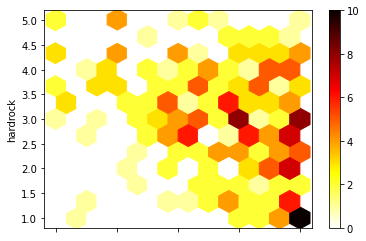

In [15]:
ax = daten.plot.hexbin(x = 'volksmusik', y = 'hardrock', gridsize = 12, colormap = "hot_r")

# gridsize: Die Anzahl an Hexagonen entlang der X-Achse

##### Gruppierung der Daten für nachfolgende Beispielgrafiken

Für die folgenden Grafiken nehmen wir anhand unseres Dataframes manche Berechnungen oder Gruppierungen vor.

Erstellen wir nun ein neues Dataframe, in welchem *wohnort* der neue Index ist und für jeden Wohnort der Mittelwert der übrigen 4 Variablen wiedergegeben wird.

In [16]:
grafik = daten.groupby(['wohnort']).mean()

grafik.round(2)

,sex,age,volksmusik,hardrock
wohnort,,,,
1,1.39,40.37,3.39,2.99
2,1.42,40.43,3.68,3.06
3,1.47,36.42,4.07,2.93


##### Säulendiagramm

Anhand dieser Daten bilden wir nun das mittlere Alter der Befragten pro Wohnort mit einem Säulendiagramm ab.

[pandas.DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html#pandas.DataFrame.plot.bar)

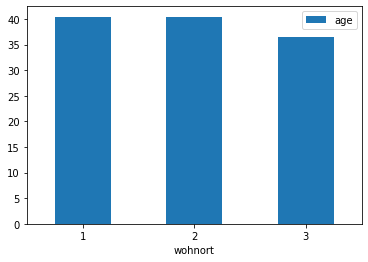

In [17]:
ax = grafik.plot.bar(y = 'age', rot = 0)

# rot: Rotation der X-Achsen Labels in Grad

Es ginge aber auch mit folgender direkten Methode (und unserem ursprünglichen Dataframe):

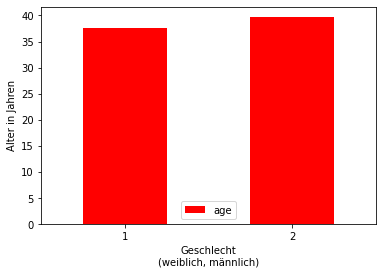

In [18]:
ax = daten.groupby(['sex']).mean().plot.bar(y = 'age', color = "red", rot = 0,
                                            ylabel = "Alter in Jahren",
                                            xlabel = "Geschlecht\n(weiblich, männlich)")

Wir können pro Ausprägung einer Variable (im Folgenden: *wohnort*) auch jeweils 2 andere Variablen (im Folgenden: *volksmusik* und *hardrock*) abbilden. Färben wir diese beiden Variablen am besten auch unterschiedlich ein.

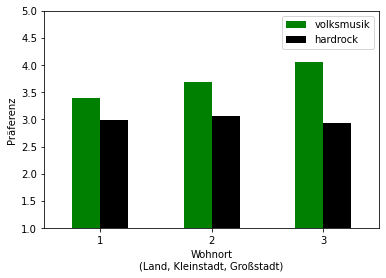

In [19]:
ax = daten.groupby(['wohnort']).mean().plot.bar(y = ["volksmusik", "hardrock"], rot = 0,
                                                color = {"volksmusik" : "green", "hardrock" : "black"},
                                                ylim=(1, 5),
                                                ylabel = "Präferenz", xlabel = "Wohnort\n(Land, Kleinstadt, Großstadt)")

# ylim: Die Skalierung (von/bis) der Y-Achse festlegen
# ylabel: Beschriftung der Y-Achse
# xlabel: Beschriftung der X-Achse ('\n' = Zeilenumbruch innerhalb der Beschriftung)

##### Balkendiagramm

Wie das Säulendiagramm, nur mit horizontalen Balken statt vertikalen Säulen...

[pandas.DataFrame.plot.barh](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html#pandas.DataFrame.plot.barh)

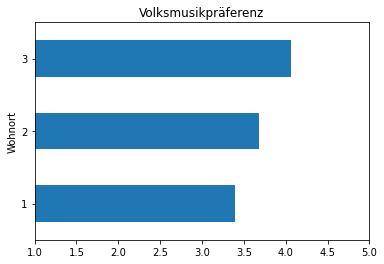

In [20]:
ax = grafik.plot.barh(y = 'volksmusik', xlim = (1, 5), title = "Volksmusikpräferenz",
                      xlabel = "Wohnort", legend = False)

# title: Diagrammtitel
# mit 'legend = False' wird die Anzeige der Legende verhindert

##### Liniendiagramm

Dies eignet sich auch gut, um Verläufe von Werten über die Zeit darzustellen. In unserem Dataframe haben wir keine solchen Variablen, daher begnügen wir uns mit einem anderen einfachen Beispiel.

[pandas.DataFrame.plot.line](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line)

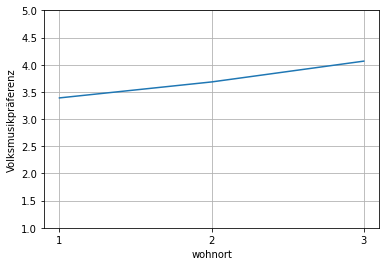

In [21]:
ax = grafik.plot.line(y = 'volksmusik', ylim = (1, 5), ylabel = "Volksmusikpräferenz",
                      grid = True, legend = False, xticks = (1, 2, 3))

# 'grid = True' zur Anzeige der Bezugslinien, um die Werte für die 3 Wohnorte besser ablesen zu können (auf der Y-Achse)
# xticks: Vorgabe der Werte für die X-Achse, um Dezimalwerte zu vermeiden (wir haben ja nur 3 Wohnorte)

##### Area Plot

Ähnlich dem Liniendiagramm, nur dass die Fläche unter der Linie farblich ausgefüllt ist. Bilden wir im Folgenden 2 Variablen ab. Man beachte, dass jede der beiden Variablen eine Skalenbandbreite von 1 bis 5 aufweist, beide Variablen zusammen somit eine Bandbreite von 1 bis 10!

[pandas.DataFrame.plot.area](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html#pandas.DataFrame.plot.area)

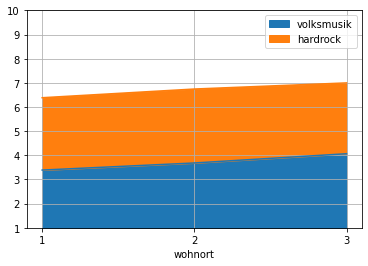

In [22]:
ax = grafik.plot.area(y = ['volksmusik', 'hardrock'], ylim = (1, 10), grid = True, xticks = (1, 2, 3))

##### Summenbildung bei einer Variable für die nachfolgende Beispielgrafik

Berechnen wir nun die Summe (Anzahl) der befragten Personen pro Wohnort.

In [23]:
grafik1 = daten['wohnort'].value_counts()

grafik1

3    139
1     95
2     60
Name: wohnort, dtype: int64

##### Tortendiagramm

Die vorhin berechneten Summen können nun in Form eines Tortendiagramms dargestellt werden.

[pandas.DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html#pandas.DataFrame.plot.pie)

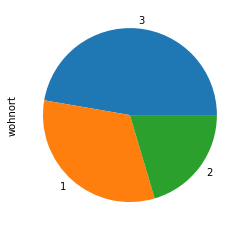

In [25]:
ax = grafik1.plot.pie(y = 'wohnort')

Es geht auch wiederum mit folgender direkten Methode (und unserem ursprünglichem Dataframe):

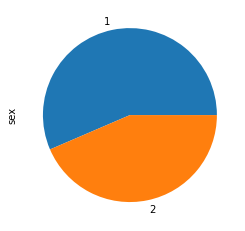

In [26]:
ax = daten['sex'].value_counts().plot.pie(y = 'age')

Wie bereits zu Beginn des Kapitels dargestellt, können alle bisher gezeigten Plots auch mit anderer Schreibweise aufgerufen werden, nämlich mit der Funktion **plot()** und Angabe des gewünschten Plots mit dem Parameter *kind*.

Möglich sind folgende Plots: "line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin".

[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

Als Beispiel dazu nachfolgend ein Histogramm:

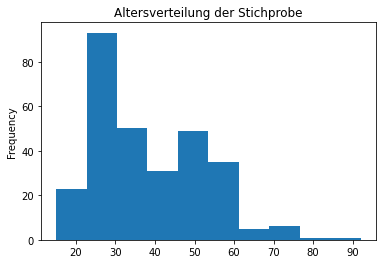

In [27]:
ax = daten.age.plot(kind = "hist", title = "Altersverteilung der Stichprobe")

##### Speichern einer Grafik

Grafiken können natürlich auch gespeichert werden.

[matplotlib.pyplot.savefig](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

**savefig()** hat viele Einstellungsmöglichkeiten, ein Blick auf die verlinkte Seite lohnt sich

In [28]:
fig = ax.get_figure() # Notwendige Vorarbeit zum speichern der Grafik

fig.savefig('C:\\Datenfiles\\test.png', dpi=150)

# Die Auflösung (dpi) kann frei gewählt werden, je höher, desto besser die Qualität (aber auch umso mehr Speicherplatz wird benötigt)

Alternativ geht folgende Schreibweise:

In [29]:
ax.get_figure().savefig('C:\\Datenfiles\\test1.png', dpi=150)

### 11.2) Plotting Teil 2

Neben den zuvor bereits dargestellten üblichen Diagrammen bietet **Pandas** im Modul **pandas.plotting** noch weitere Grafiken, von denen ein paar nachfolgend mit je einem Beispiel vorgestellt werden.

[Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

##### Bootstrap Plot

[pandas.plotting.bootstrap_plot9](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.bootstrap_plot.html#pandas.plotting.bootstrap_plot)

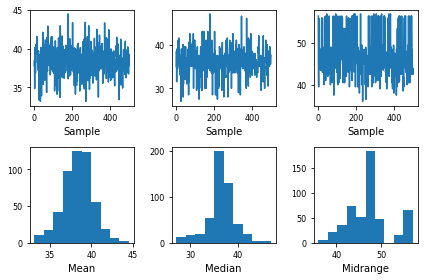

In [33]:
ax = pd.plotting.bootstrap_plot(daten.age, size = 50, samples = 500)

##### Parallel Coordinates

[pandas.plotting.parallel_coordinates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html#pandas.plotting.parallel_coordinates)

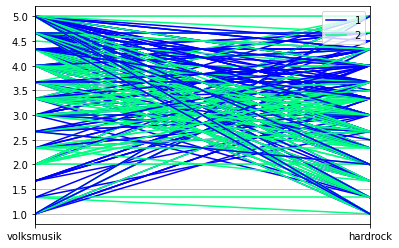

In [37]:
ax = pd.plotting.parallel_coordinates(daten, "sex", cols = ["volksmusik", "hardrock"], colormap = "winter")

##### RadViz Plot

[pandas.plotting.radviz](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.radviz.html#pandas.plotting.radviz)

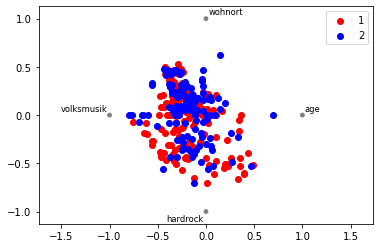

In [43]:
ax = pd.plotting.radviz(daten, 'sex', colormap = "bwr_r")

##### Scatter Matrix Plot

[pandas.plotting.scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html#pandas.plotting.scatter_matrix)

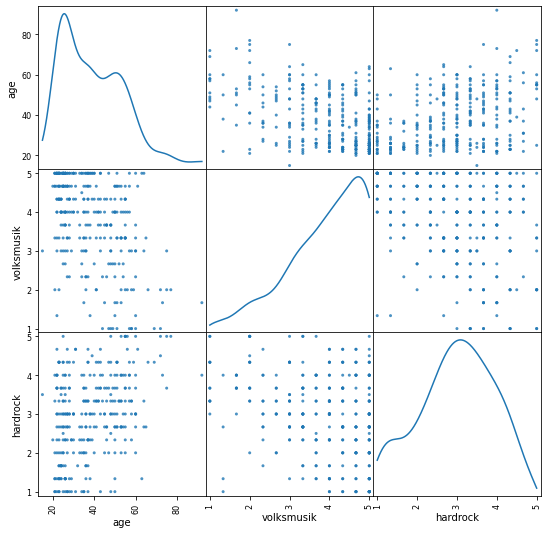

In [44]:
ax = pd.plotting.scatter_matrix(daten[['age', 'volksmusik', 'hardrock']], alpha = 0.8, figsize = (9, 9), diagonal = 'kde')

<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
     <td style="text-align:center; background-color:transparent">https://github.com/manfred2020/DA_mit_Python</td>
  </tr>
</table>